<center><h1>Data Science Capstone Project</h1></center>

<img src="http://www.ministryofcars.net/wp-content/uploads/2018/06/Car-Accident-Lawyers-and-Why-You-Need-Them-300x300.jpg">

<p>Only in the US, the average number of car accidents every year is 6 million, where more than 90 people die every day and because of this. The “lucky ones”, whose are approximately 3 million get injured, however around 2 million people experience permanent injuries. This is a serious problem, wouldn´t be nice to have a predictive model for predicting, based on certain features, the probability of potential severity damages? Before proceeding, let´s address the elephant in the room, what if instead of helping people, the predictive model provokes fear to drive. The predictive model should only be used for guidance, for example, if the predictive model dictates that there is a high probability of having an accident during a storm in a road with bad conditions, the driver should take another route or wait until the weather improves. This will not only help the drivers but also the paramedics, police officers, insurance companies and hospitals, with this kind of information they will be able to be prepare for any situation.</p>

<p>Because conditions can be different at any city and we´re looking for the best possible accuracy, this model will have as scope the city of Seattle. The data set will be provided by SDOT Traffic Management Division, Traffic Records Group. The data set includes all types of collisions, which will display at the intersection or mid-block of a segment. Timeframe: 2004 to Present.</p>

<img src="https://www.weather-us.com/weather/images/city/4/5/2391954-750-75.jpg">

In [1]:
import pandas as pd
import numpy as np

<p>First, let´s load and explore the data set</p>

In [2]:
df = pd.read_csv("Data-Collisions.csv")

C:\Users\Josem\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N
5,1,-122.387598,47.690575,6,320840,322340,E919477,Matched,Intersection,36974.0,...,Dry,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
6,1,-122.338485,47.618534,7,83300,83300,3282542,Matched,Intersection,29510.0,...,Wet,Daylight,NaN,8344002.0,NaN,10,Entering at angle,0,0,N
7,2,-122.320780,47.614076,9,330897,332397,EA30304,Matched,Intersection,29745.0,...,Dry,Daylight,NaN,NaN,NaN,5,Vehicle Strikes Pedalcyclist,6855,0,N
8,1,-122.335930,47.611904,10,63400,63400,2071243,Matched,Block,NaN,...,Dry,Daylight,NaN,6166014.0,NaN,32,One parked--one moving,0,0,N
9,2,-122.384700,47.528475,12,58600,58600,2072105,Matched,Intersection,34679.0,...,Dry,Daylight,NaN,6079001.0,NaN,10,Entering at angle,0,0,N


In [4]:
for i in df.columns:
    print("\n" + i + "\n")
    print(pd.value_counts(df[i]))


SEVERITYCODE

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

X

-122.332653    265
-122.344896    254
-122.328079    252
-122.344997    239
-122.299160    231
-122.351134    212
-122.347294    190
-122.345863    163
-122.332451    160
-122.269988    152
-122.329049    147
-122.310949    146
-122.289923    142
-122.334666    138
-122.339174    136
-122.321920    136
-122.329974    135
-122.335571    133
-122.302329    132
-122.324615    131
-122.269982    130
-122.339439    129
-122.339559    129
-122.316733    128
-122.333757    128
-122.277664    128
-122.323239    126
-122.334792    125
-122.327525    121
-122.287546    121
              ... 
-122.339360      1
-122.350751      1
-122.290428      1
-122.360492      1
-122.346878      1
-122.373860      1
-122.394434      1
-122.291681      1
-122.301697      1
-122.354259      1
-122.386178      1
-122.390046      1
-122.363168      1
-122.349259      1
-122.275380      1
-122.286628      1
-122.280863      1
-122.303664 

2006/11/02 00:00:00+00    96
2008/10/03 00:00:00+00    92
2005/05/18 00:00:00+00    84
2006/01/13 00:00:00+00    83
2005/11/05 00:00:00+00    83
2008/10/31 00:00:00+00    82
2005/04/29 00:00:00+00    76
2005/04/15 00:00:00+00    75
2007/10/19 00:00:00+00    74
2004/12/04 00:00:00+00    74
2007/07/20 00:00:00+00    73
2005/10/28 00:00:00+00    73
2016/10/13 00:00:00+00    73
2006/06/01 00:00:00+00    73
2010/11/22 00:00:00+00    70
2007/11/15 00:00:00+00    70
2006/10/18 00:00:00+00    70
2006/11/04 00:00:00+00    70
2006/11/22 00:00:00+00    69
2005/11/04 00:00:00+00    69
2010/10/09 00:00:00+00    68
2007/01/05 00:00:00+00    68
2006/11/21 00:00:00+00    68
2006/04/08 00:00:00+00    68
2006/05/05 00:00:00+00    68
2006/11/10 00:00:00+00    68
2005/11/11 00:00:00+00    68
2006/11/06 00:00:00+00    68
2005/12/10 00:00:00+00    68
2018/06/08 00:00:00+00    67
                          ..
2020/05/04 00:00:00+00     6
2020/04/06 00:00:00+00     6
2020/04/29 00:00:00+00     6
2020/04/07 00:

<p>Based on a very simple exploratory analysis to separate the features and target variable of the data provided, the column SEVERITYCODE will be selected as the target variable. On the other hand, the columns ADDRTYPE, LOCATION, COLLISIONTYPE, PERSONCOUNT, VEHCOUNT, INCDATE, JUNCTIONTYPE, WEATHER, ROADCOND and LIGHTCOND are candidates for features. The next list contains a description of the selected columns.</p>

<ul>
    <li><b>SEVERITYCODE:</b> A code that corresponds to the severity of the collision: 2 -> injury 1-> prop damage</li>
    <li><b>ADDRTYPE:</b> Collision address type: Alley, Block or Intersection</li>
    <li><b>LOCATION:</b> Description of the general location of the collision</li>
    <li><b>COLLISIONTYPE:</b> Collision type</li>
    <li><b>PERSONCOUNT:</b> The total number of people involved in the collision</li>
    <li><b>VEHCOUNT:</b> The number of vehicles involved in the collision</li>
    <li><b>INCDATE:</b> The date of the incident</li>
    <li><b>JUNCTIONTYPE:</b> Category of junction at which collision took place</li>
    <li><b>WEATHER:</b> A description of the weather conditions during the time of the collision</li>
    <li><b>ROADCOND:</b> The condition of the road during the collision</li>
    <li><b>LIGHTCOND:</b> The light conditions during the collision</li>
</ul>

<p>Let´s select only the columns we´re interested</p>

In [5]:
df_data = df[[
            "SEVERITYCODE",
            "ADDRTYPE",
            "LOCATION",
            "COLLISIONTYPE",
            "PERSONCOUNT",
            "VEHCOUNT",
            "INCDATE",
            "JUNCTIONTYPE",
            "WEATHER",
            "ROADCOND",
            "LIGHTCOND"    
            ]]

<p>Next step, let´s look for missing data</p>

In [6]:
for i in df_data.columns:
    print("Column " + i + ": " + str(df_data[i].isnull().sum()) + "\n")

Column SEVERITYCODE: 0

Column ADDRTYPE: 1926

Column LOCATION: 2677

Column COLLISIONTYPE: 4904

Column PERSONCOUNT: 0

Column VEHCOUNT: 0

Column INCDATE: 0

Column JUNCTIONTYPE: 6329

Column WEATHER: 5081

Column ROADCOND: 5012

Column LIGHTCOND: 5170



<p>As we can see, there is missing data in the columns: </p>

<ul>
    <li>ADDRTYPE</li>
    <li>LOCATION</li>
    <li>COLLISIONTYPE</li>
    <li>JUNCTIONTYPE</li>
    <li>WEATHER</li>
    <li>ROADCOND</li>
    <li>LIGHTCOND</li>
</ul>

<p>Before procceding, let´s find out the type of data we´re dealing with</p>

In [7]:
for i in df_data.columns:
    print("Column " + i + ": " + str(df_data[i].dtypes) + "\n")

Column SEVERITYCODE: int64

Column ADDRTYPE: object

Column LOCATION: object

Column COLLISIONTYPE: object

Column PERSONCOUNT: int64

Column VEHCOUNT: int64

Column INCDATE: object

Column JUNCTIONTYPE: object

Column WEATHER: object

Column ROADCOND: object

Column LIGHTCOND: object



<p>Now that we big a bigger picture of the data we´re dealing with, let´s address a few issues</p>

<h3>Extracting the months of the date</h3>

<p>The column INCDATE contains the dates of the accidents, however we only require the month</p>

In [8]:
for i in range(0, len(df_data["INCDATE"])):
    year, month, day = df_data["INCDATE"][i].split('/')
    df_data["INCDATE"][i] = int(month)

df_data.head()

C:\Users\Josem\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Josem\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3325: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


,SEVERITYCODE,ADDRTYPE,LOCATION,COLLISIONTYPE,PERSONCOUNT,VEHCOUNT,INCDATE,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND
0,2,Intersection,5TH AVE NE AND NE 103RD ST,Angles,2,2,3,At Intersection (intersection related),Overcast,Wet,Daylight
1,1,Block,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,Sideswipe,2,2,12,Mid-Block (not related to intersection),Raining,Wet,Dark - Street Lights On
2,1,Block,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,Parked Car,4,3,11,Mid-Block (not related to intersection),Overcast,Dry,Daylight
3,1,Block,2ND AVE BETWEEN MARION ST AND MADISON ST,Other,3,3,3,Mid-Block (not related to intersection),Clear,Dry,Daylight
4,2,Intersection,SWIFT AVE S AND SWIFT AV OFF RP,Angles,2,2,1,At Intersection (intersection related),Raining,Wet,Daylight


<h3>Missing data</h3>

<p>Instead of dropping the the records, we´re going to replace the missing data with the most recurrent value of each column</p>

In [9]:
from statistics import mode

In [10]:
df_data["ADDRTYPE"].fillna(mode(df_data["ADDRTYPE"]), inplace = True)
df_data["LOCATION"].fillna("BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB AND AURORA AVE N", inplace = True)
df_data["COLLISIONTYPE"].fillna(mode(df_data["COLLISIONTYPE"]), inplace = True)
df_data["JUNCTIONTYPE"].fillna(mode(df_data["JUNCTIONTYPE"]), inplace = True)
df_data["WEATHER"].fillna(mode(df_data["WEATHER"]), inplace = True)
df_data["ROADCOND"].fillna(mode(df_data["ROADCOND"]), inplace = True)
df_data["LIGHTCOND"].fillna(mode(df_data["LIGHTCOND"]), inplace = True)

for i in df_data.columns:
    print("Column " + i + ": " + str(df_data[i].isnull().sum()) + "\n")

C:\Users\Josem\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


Column SEVERITYCODE: 0

Column ADDRTYPE: 0

Column LOCATION: 0

Column COLLISIONTYPE: 0

Column PERSONCOUNT: 0

Column VEHCOUNT: 0

Column INCDATE: 0

Column JUNCTIONTYPE: 0

Column WEATHER: 0

Column ROADCOND: 0

Column LIGHTCOND: 0



<p>Now, let´s deal with the records that are not very significant</p>

<h3>Data not very significant</h3>

<p>By looking the value count of each column we observe that the next columns contain values that are not very significant<p/>

<ul>
    <li>JUNCTIONTYPE -> Unknown</li>
    <li>WEATHER -> Unknown and Other</li>
    <li>LIGHTCOND-> Other Dark, Unknown, Unknown Lighting</li>
    <li>ROADCOND -> Other and Unknown</li>
    <li>COLLISIONTYPE -> Other</li>
</ul>

In [11]:
print("JUNCTIONTYPE\n")
print(pd.value_counts(df_data["JUNCTIONTYPE"]))
print("\nWEATHER\n")
print(pd.value_counts(df_data["WEATHER"]))
print("\nLIGHTCOND\n")
print(pd.value_counts(df_data["LIGHTCOND"]))
print("\nROADCOND\n")
print(pd.value_counts(df_data["ROADCOND"]))
print("\nCOLLISIONTYPE\n")
print(pd.value_counts(df_data["COLLISIONTYPE"]))

JUNCTIONTYPE

Mid-Block (not related to intersection)              96129
At Intersection (intersection related)               62810
Mid-Block (but intersection related)                 22790
Driveway Junction                                    10671
At Intersection (but not related to intersection)     2098
Ramp Junction                                          166
Unknown                                                  9
Name: JUNCTIONTYPE, dtype: int64

WEATHER

Clear                       116216
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

LIGHTCOND

Daylight                    121307
Dark - Street Lights On      48507
Unknown                      13473


<p>In this particular case, we´ll deal with each column differently</p>

<h4>JUNCTIONTYPE</h4>

<p>For this column, we´re going to replace the value Unknown for the most recurrent value in the column</p>

In [12]:
df_data["JUNCTIONTYPE"].replace("Unknown", "Mid-Block (not related to intersection)", inplace = True)

pd.value_counts(df_data["JUNCTIONTYPE"])

C:\Users\Josem\Anaconda3\lib\site-packages\pandas\core\generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


Mid-Block (not related to intersection)              96138
At Intersection (intersection related)               62810
Mid-Block (but intersection related)                 22790
Driveway Junction                                    10671
At Intersection (but not related to intersection)     2098
Ramp Junction                                          166
Name: JUNCTIONTYPE, dtype: int64

<h4>WEATHER</h4>

<p>For this column, we´re going to replace the value Unknown for the most recurrent value in the column and drop all the records with the value Other</p>

In [13]:
df_data["WEATHER"].replace("Unknown", "Clear", inplace = True)
df_data = df_data[df_data["WEATHER"] != "Other"]

pd.value_counts(df_data["WEATHER"])

Clear                       131307
Raining                      33145
Overcast                     27714
Snowing                        907
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

<h4>LIGHTCOND</h4>

<p>For this column, we´re going to replace the value Unknown for the most recurrent value in the column and drop all the records with the values Other and Dark - Unknown Lighting</p>

In [14]:
df_data["LIGHTCOND"].replace("Unknown", "Daylight", inplace = True)
df_data = df_data[df_data["LIGHTCOND"] != "Other"]
df_data = df_data[df_data["LIGHTCOND"] != "Dark - Unknown Lighting"]

pd.value_counts(df_data["LIGHTCOND"])

Daylight                    134155
Dark - Street Lights On      48365
Dusk                          5880
Dawn                          2494
Dark - No Street Lights       1528
Dark - Street Lights Off      1194
Name: LIGHTCOND, dtype: int64

<h4>ROADCOND</h4>

<p>For this column, we´re going to replace the value Unknown for the most recurrent value in the column and drop all the records with the value Other</p>

In [15]:
df_data["ROADCOND"].replace("Unknown", "Dry", inplace = True)
df_data = df_data[df_data["ROADCOND"] != "Other"]

pd.value_counts(df_data["ROADCOND"])

Dry               143754
Wet                47315
Ice                 1189
Snow/Slush           990
Standing Water       112
Sand/Mud/Dirt         74
Oil                   63
Name: ROADCOND, dtype: int64

<h4>COLLISIONTYPE</h4>

<p>For this column, we´re going to drop all the records with the value Other</p>

In [16]:
df_data = df_data[df_data["COLLISIONTYPE"] != "Other"]

pd.value_counts(df_data["COLLISIONTYPE"])

Parked Car    52279
Angles        34578
Rear Ended    33950
Sideswipe     18538
Left Turn     13662
Pedestrian     6578
Cycles         5403
Right Turn     2950
Head On        2014
Name: COLLISIONTYPE, dtype: int64

<p>Now that we have fixed our data, let´s transform categorical data to numberical data</p>

<h3>Transforming categorical data to numerical data</h3>

In [17]:
for i in df_data.columns:
    print("Column " + i + ": " + str(df_data[i].dtypes) + "\n")

Column SEVERITYCODE: int64

Column ADDRTYPE: object

Column LOCATION: object

Column COLLISIONTYPE: object

Column PERSONCOUNT: int64

Column VEHCOUNT: int64

Column INCDATE: object

Column JUNCTIONTYPE: object

Column WEATHER: object

Column ROADCOND: object

Column LIGHTCOND: object



In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
lb_make = LabelEncoder()
df_data["ADDRTYPE_CODE"] = lb_make.fit_transform(df_data["ADDRTYPE"])
df_data["LOCATION_CODE"] = lb_make.fit_transform(df_data["LOCATION"])
df_data["COLLISIONTYPE_CODE"] = lb_make.fit_transform(df_data["COLLISIONTYPE"])
df_data["JUNCTIONTYPE_CODE"] = lb_make.fit_transform(df_data["JUNCTIONTYPE"])
df_data["WEATHER_CODE"] = lb_make.fit_transform(df_data["WEATHER"])
df_data["ROADCOND_CODE"] = lb_make.fit_transform(df_data["ROADCOND"])
df_data["LIGHTCOND_CODE"] = lb_make.fit_transform(df_data["LIGHTCOND"])

In [20]:
df_data["INCDATE"] = df_data["INCDATE"].astype(int)

In [21]:
print(df_data["INCDATE"].dtypes)

int32


<p>Before procceding, we´ll create dataframes with goal of keeping track of the definition to each code with it´s value</p>

In [22]:
data_tuples = list(zip(list(pd.value_counts(df_data["ADDRTYPE_CODE"]).index), list(pd.value_counts(df_data["ADDRTYPE"]).index)))
def_ADDRTYPE = pd.DataFrame(data_tuples, columns = ["Code", "Value"])
def_ADDRTYPE

,Code,Value
0,1,Block
1,2,Intersection
2,0,Alley


In [23]:
data_tuples = list(zip(list(pd.value_counts(df_data["LOCATION_CODE"]).index), list(pd.value_counts(df_data["LOCATION"]).index)))
def_LOCATION = pd.DataFrame(data_tuples, columns = ["Code", "Value"])
def_LOCATION

,Code,Value
0,10094,BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB ...
1,8530,6TH AVE AND JAMES ST
2,15810,N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND COR...
3,9932,AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST
4,18136,RAINIER AVE S BETWEEN S BAYVIEW ST AND S MCCLE...
5,9936,AURORA AVE N BETWEEN N 130TH ST AND N 135TH ST
6,22244,WEST SEATTLE BR EB BETWEEN ALASKAN WY VI NB ON...
7,10003,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N
8,8117,5TH AVE AND SPRING ST
9,2191,1ST AVE BETWEEN BLANCHARD ST AND BELL ST


In [24]:
data_tuples = list(zip(list(pd.value_counts(df_data["COLLISIONTYPE_CODE"]).index), list(pd.value_counts(df_data["COLLISIONTYPE"]).index)))
def_COLLISIONTYPE = pd.DataFrame(data_tuples, columns = ["Code", "Value"])
def_COLLISIONTYPE

,Code,Value
0,4,Parked Car
1,0,Angles
2,6,Rear Ended
3,8,Sideswipe
4,3,Left Turn
5,5,Pedestrian
6,1,Cycles
7,7,Right Turn
8,2,Head On


In [25]:
data_tuples = list(zip(list(pd.value_counts(df_data["JUNCTIONTYPE_CODE"]).index), list(pd.value_counts(df_data["JUNCTIONTYPE"]).index)))
def_JUNCTIONTYPE = pd.DataFrame(data_tuples, columns = ["Code", "Value"])
def_JUNCTIONTYPE

,Code,Value
0,4,Mid-Block (not related to intersection)
1,1,At Intersection (intersection related)
2,3,Mid-Block (but intersection related)
3,2,Driveway Junction
4,0,At Intersection (but not related to intersection)
5,5,Ramp Junction


In [26]:
data_tuples = list(zip(list(pd.value_counts(df_data["WEATHER_CODE"]).index), list(pd.value_counts(df_data["WEATHER"]).index)))
def_WEATHER = pd.DataFrame(data_tuples, columns = ["Code", "Value"])
def_WEATHER

,Code,Value
0,1,Clear
1,5,Raining
2,3,Overcast
3,8,Snowing
4,2,Fog/Smog/Smoke
5,7,Sleet/Hail/Freezing Rain
6,0,Blowing Sand/Dirt
7,6,Severe Crosswind
8,4,Partly Cloudy


In [27]:
data_tuples = list(zip(list(pd.value_counts(df_data["ROADCOND_CODE"]).index), list(pd.value_counts(df_data["ROADCOND"]).index)))
def_ROADCOND = pd.DataFrame(data_tuples, columns = ["Code", "Value"])
def_ROADCOND

,Code,Value
0,0,Dry
1,6,Wet
2,4,Snow/Slush
3,1,Ice
4,5,Standing Water
5,3,Sand/Mud/Dirt
6,2,Oil


In [28]:
data_tuples = list(zip(list(pd.value_counts(df_data["LIGHTCOND_CODE"]).index), list(pd.value_counts(df_data["LIGHTCOND"]).index)))
def_LIGHTCOND = pd.DataFrame(data_tuples, columns = ["Code", "Value"])
def_LIGHTCOND

,Code,Value
0,4,Daylight
1,2,Dark - Street Lights On
2,5,Dusk
3,3,Dawn
4,0,Dark - No Street Lights
5,1,Dark - Street Lights Off


In [29]:
df_data.head()

,SEVERITYCODE,ADDRTYPE,LOCATION,COLLISIONTYPE,PERSONCOUNT,VEHCOUNT,INCDATE,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,ADDRTYPE_CODE,LOCATION_CODE,COLLISIONTYPE_CODE,JUNCTIONTYPE_CODE,WEATHER_CODE,ROADCOND_CODE,LIGHTCOND_CODE
0,2,Intersection,5TH AVE NE AND NE 103RD ST,Angles,2,2,3,At Intersection (intersection related),Overcast,Wet,Daylight,2,8192,0,1,3,6,4
1,1,Block,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,Sideswipe,2,2,12,Mid-Block (not related to intersection),Raining,Wet,Dark - Street Lights On,1,10003,8,4,5,6,2
2,1,Block,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,Parked Car,4,3,11,Mid-Block (not related to intersection),Overcast,Dry,Daylight,1,7512,4,4,3,0,4
4,2,Intersection,SWIFT AVE S AND SWIFT AV OFF RP,Angles,2,2,1,At Intersection (intersection related),Raining,Wet,Daylight,2,21322,0,1,5,6,4
5,1,Intersection,24TH AVE NW AND NW 85TH ST,Angles,2,2,4,At Intersection (intersection related),Clear,Dry,Daylight,2,3444,0,1,1,0,4


<p>Finally, the data is clean and ready to work for</p>

<h3>Data Analysis</h3>

In [30]:
pd.DataFrame(df_data.groupby(["SEVERITYCODE"])["INCDATE"].value_counts())

INCDATE
SEVERITYCODE INCDATE         
1            10         10546
             6          10188
             5          10080
             1          10000
             11          9952
             3           9935
             7           9837
             4           9761
             8           9736
             9           9608
             12          9527
             2           8874
2            10          4860
             5           4652
             7           4566
             8           4527
             6           4435
             11          4341
             9           4314
             4           4272
             3           4229
             1           4190
             12          3869
             2           3653

In [31]:
pd.DataFrame(df_data.groupby(["SEVERITYCODE"])["COLLISIONTYPE"].value_counts())

COLLISIONTYPE
SEVERITYCODE COLLISIONTYPE               
1            Parked Car             48591
             Angles                 20982
             Rear Ended             19344
             Sideswipe              16040
             Left Turn               8264
             Right Turn              2342
             Head On                 1146
             Cycles                   669
             Pedestrian               666
2            Rear Ended             14606
             Angles                 13596
             Pedestrian              5912
             Left Turn               5398
             Cycles                  4734
             Parked Car              3688
             Sideswipe               2498
             Head On                  868
             Right Turn               608

In [32]:
pd.DataFrame(df_data.groupby(["SEVERITYCODE"])["JUNCTIONTYPE"].value_counts())

JUNCTIONTYPE
SEVERITYCODE JUNCTIONTYPE                                                   
1            Mid-Block (not related to intersection)                   66039
             At Intersection (intersection related)                    32955
             Mid-Block (but intersection related)                      12928
             Driveway Junction                                          4747
             At Intersection (but not related to intersection)          1285
             Ramp Junction                                                90
2            At Intersection (intersection related)                    26195
             Mid-Block (not related to intersection)                   16297
             Mid-Block (but intersection related)                       6658
             Driveway Junction                                          2154
             At Intersection (but not related to intersection)           561
             Ramp Junction                                                43

In [33]:
pd.DataFrame(df_data.groupby(["SEVERITYCODE"])["WEATHER"].value_counts())

WEATHER
SEVERITYCODE WEATHER                          
1            Clear                       83005
             Raining                     18005
             Overcast                    16038
             Snowing                       586
             Fog/Smog/Smoke                298
             Sleet/Hail/Freezing Rain       59
             Blowing Sand/Dirt              38
             Severe Crosswind               14
             Partly Cloudy                   1
2            Clear                       34081
             Raining                      9761
             Overcast                     7757
             Fog/Smog/Smoke                142
             Snowing                       126
             Sleet/Hail/Freezing Rain       23
             Blowing Sand/Dirt              13
             Partly Cloudy                   3
             Severe Crosswind                2

In [34]:
pd.DataFrame(df_data.groupby(["SEVERITYCODE"])["ROADCOND"].value_counts())

ROADCOND
SEVERITYCODE ROADCOND                
1            Dry                90605
             Wet                26071
             Snow/Slush           670
             Ice                  616
             Standing Water        42
             Sand/Mud/Dirt         24
             Oil                   16
2            Dry                37822
             Wet                13751
             Ice                  175
             Snow/Slush           122
             Standing Water        15
             Sand/Mud/Dirt         13
             Oil                   10

In [35]:
pd.DataFrame(df_data.groupby(["SEVERITYCODE"])["LIGHTCOND"].value_counts())

LIGHTCOND
SEVERITYCODE LIGHTCOND                          
1            Daylight                      84200
             Dark - Street Lights On       27406
             Dusk                           3451
             Dawn                           1354
             Dark - No Street Lights         920
             Dark - Street Lights Off        713
2            Daylight                      36726
             Dark - Street Lights On       12203
             Dusk                           1746
             Dawn                            703
             Dark - No Street Lights         265
             Dark - Street Lights Off        265

In [36]:
pd.DataFrame(df_data.groupby(["SEVERITYCODE"])["LOCATION"].value_counts().nlargest(3))

,,LOCATION
SEVERITYCODE,LOCATION,
1,BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB AND AURORA AVE N,1989
2,BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB AND AURORA AVE N,238
1,6TH AVE AND JAMES ST,143


In [37]:
pd.DataFrame(df_data.groupby(["SEVERITYCODE"])["VEHCOUNT"].value_counts())

VEHCOUNT
SEVERITYCODE VEHCOUNT          
1            2           103977
             3             7212
             0             3858
             1             1337
             4             1283
             5              259
             6               83
             7               22
             8                7
             9                3
             11               2
             12               1
2            2            33648
             1            10384
             3             5286
             0             1224
             4             1038
             5              242
             6               55
             7               18
             8                5
             9                5
             11               2
             10               1

In [38]:
pd.DataFrame(df_data.groupby(["SEVERITYCODE"])["PERSONCOUNT"].value_counts().nlargest(3))

,,PERSONCOUNT
SEVERITYCODE,PERSONCOUNT,
1,2,79978
2,2,25949
1,3,20250


<p>Interesting, most of the car incidents with a severity code of 1 and 2 have ocurred in October but if we observe the second and third place some differences begin to show up. Having a severity code of 1 we have June and May as second and third place respectively, on the other hand with a severity code of 2, May and July are in second and third place.</p>

<p>Most of the collisions with a severity code of 1 have been of type parked car while rear ended type corresponds to a severity code of 2.</p>

<p>If we observe the junctions types where collisions have occured, we observe that most of the incidents with a severity code of 1 have occured in a mid-block not related to the intersection but with a severity code of 2 most of the collisions occured at the intersection.</p>

<p>We might think that a bad weather could increase the number of car accidents and while we observe that raining is in second place for both cases of severity codes, having a clear sky is in the first place for both cases. Having as a consequence that the road conditions match the weather conditions.</p>

<p>Does bad lighting conditions affect the number of car accidents? Not really, we observe that for both cases most of the incidents have occured in daylight.</p>

<p>In most of the accidents, only 2 vehicles were involved with just 2 drivers involved with no passengers.<p/>

<p>What is the location where more accidents have occured? BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB AND AURORA AVE N is the location for both cases that have more accidents than any other. Why is that? Let´s examine it.</p>

In [39]:
df_test = df_data[df_data["LOCATION_CODE"] == 10094]
df_test.head()

,SEVERITYCODE,ADDRTYPE,LOCATION,COLLISIONTYPE,PERSONCOUNT,VEHCOUNT,INCDATE,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,ADDRTYPE_CODE,LOCATION_CODE,COLLISIONTYPE_CODE,JUNCTIONTYPE_CODE,WEATHER_CODE,ROADCOND_CODE,LIGHTCOND_CODE
74,1,Block,BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB ...,Parked Car,0,2,8,Mid-Block (not related to intersection),Clear,Dry,Daylight,1,10094,4,4,1,0,4
171,1,Block,BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB ...,Parked Car,2,2,7,Mid-Block (not related to intersection),Clear,Dry,Daylight,1,10094,4,4,1,0,4
268,1,Block,BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB ...,Parked Car,3,3,3,Mid-Block (not related to intersection),Clear,Dry,Dark - Street Lights On,1,10094,4,4,1,0,2
309,1,Block,BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB ...,Rear Ended,3,2,10,Mid-Block (not related to intersection),Clear,Dry,Dark - Street Lights On,1,10094,6,4,1,0,2
355,1,Block,BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB ...,Parked Car,2,2,9,Mid-Block (not related to intersection),Clear,Dry,Daylight,1,10094,4,4,1,0,4


In [40]:
pd.DataFrame(df_test.groupby(["SEVERITYCODE"])["INCDATE"].value_counts())

INCDATE
SEVERITYCODE INCDATE         
1            5            206
             3            203
             4            186
             1            177
             6            176
             12           171
             7            166
             8            148
             10           146
             11           142
             2            137
             9            131
2            10            30
             6             27
             8             27
             7             24
             4             23
             11            18
             1             17
             3             16
             5             15
             12            15
             9             14
             2             12

In [41]:
pd.DataFrame(df_test.groupby(["SEVERITYCODE"])["COLLISIONTYPE"].value_counts())

COLLISIONTYPE
SEVERITYCODE COLLISIONTYPE               
1            Parked Car              1508
             Rear Ended               193
             Sideswipe                145
             Angles                    96
             Left Turn                 21
             Right Turn                13
             Head On                   10
             Cycles                     2
             Pedestrian                 1
2            Rear Ended                99
             Pedestrian                40
             Parked Car                32
             Angles                    24
             Sideswipe                 22
             Cycles                    10
             Left Turn                  6
             Right Turn                 3
             Head On                    2

In [42]:
pd.DataFrame(df_test.groupby(["SEVERITYCODE"])["JUNCTIONTYPE"].value_counts())

JUNCTIONTYPE
SEVERITYCODE JUNCTIONTYPE                                                   
1            Mid-Block (not related to intersection)                    1933
             Driveway Junction                                            29
             At Intersection (intersection related)                       14
             Mid-Block (but intersection related)                         11
             At Intersection (but not related to intersection)             2
2            Mid-Block (not related to intersection)                     217
             At Intersection (intersection related)                        8
             Driveway Junction                                             8
             Mid-Block (but intersection related)                          3
             Ramp Junction                                                 2

In [43]:
pd.DataFrame(df_test.groupby(["SEVERITYCODE"])["WEATHER"].value_counts())

WEATHER
SEVERITYCODE WEATHER                          
1            Clear                        1698
             Raining                       145
             Overcast                      135
             Fog/Smog/Smoke                  5
             Blowing Sand/Dirt               3
             Snowing                         3
2            Clear                         162
             Raining                        38
             Overcast                       32
             Blowing Sand/Dirt               2
             Snowing                         2
             Fog/Smog/Smoke                  1
             Sleet/Hail/Freezing Rain        1

In [44]:
pd.DataFrame(df_test.groupby(["SEVERITYCODE"])["ROADCOND"].value_counts())

ROADCOND
SEVERITYCODE ROADCOND                
1            Dry                 1774
             Wet                  197
             Ice                    9
             Snow/Slush             7
             Sand/Mud/Dirt          1
             Standing Water         1
2            Dry                  185
             Wet                   50
             Ice                    2
             Snow/Slush             1

In [45]:
pd.DataFrame(df_test.groupby(["SEVERITYCODE"])["LIGHTCOND"].value_counts())

LIGHTCOND
SEVERITYCODE LIGHTCOND                          
1            Daylight                       1660
             Dark - Street Lights On         231
             Dusk                             45
             Dark - No Street Lights          25
             Dawn                             16
             Dark - Street Lights Off         12
2            Daylight                        189
             Dark - Street Lights On          36
             Dusk                              6
             Dark - No Street Lights           5
             Dawn                              2

<p>Based on the results, my guess would be distraction, according to the records it´s not because of weather, road or light conditions. Most of the accidents occured in mid-blocks and most of the collisions are of type parked car and rear ended. Perhaps the festivities celebrated during the months of May and October have something to do.</p>

<h3>Predictive Model</h3>

<p>Once we have analysed the data, it´s time to find a predictive model for preventing further accidents based on the candidate features</p>

In [46]:
from sklearn import metrics
import matplotlib.pyplot as plt

<h4>Normalize data</h4>

In [47]:
from sklearn import preprocessing

In [48]:
y = df_data[["SEVERITYCODE"]]

x = df_data[
    ["PERSONCOUNT",
     "VEHCOUNT",
     "INCDATE",
     "ADDRTYPE_CODE",
     "LOCATION_CODE",
     "COLLISIONTYPE_CODE",
     "JUNCTIONTYPE_CODE",
     "WEATHER_CODE",
     "ROADCOND_CODE",
     "LIGHTCOND_CODE"]
]

In [49]:
X = preprocessing.StandardScaler().fit(x).transform(x)
X[0:5]

array([[-0.40597282,  0.0223354 , -1.03543259,  1.32667178, -0.47369804,
        -1.54676327, -1.2332327 ,  0.65707685,  1.79519618,  0.52078015],
       [-0.40597282,  0.0223354 ,  1.59685724, -0.73662171, -0.18479119,
         1.61528277,  0.92181256,  1.93118962,  1.79519618, -1.59278437],
       [ 1.1130077 ,  1.66702616,  1.30438059, -0.73662171, -0.58217769,
         0.03425975,  0.92181256,  0.65707685, -0.56266929,  0.52078015],
       [-0.40597282,  0.0223354 , -1.62038589,  1.32667178,  1.62091647,
        -1.54676327, -1.2332327 ,  1.93118962,  1.79519618,  0.52078015],
       [-0.40597282,  0.0223354 , -0.74295594,  1.32667178, -1.23114127,
        -1.54676327, -1.2332327 , -0.61703592, -0.56266929,  0.52078015]])

<h4>Split Data</h4>

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (135961, 10) (135961, 1)
Test set: (33991, 10) (33991, 1)


<h4>K Nearest Neighbor(KNN)</h4>

In [52]:
from sklearn.neighbors import KNeighborsClassifier

In [53]:
Ks = 10
mean_acc = np.zeros((Ks - 1))
std_acc = np.zeros((Ks - 1))
ConfustionMx = [];

for n in range(1, Ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train, y_train)
    yhat = neigh.predict(X_test)
    
    mean_acc[n - 1] = metrics.accuracy_score(y_test, yhat)
    
mean_acc

C:\Users\Josem\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
C:\Users\Josem\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
C:\Users\Josem\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
C:\Users\Josem\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
C:\Users\Josem\Anaconda3\lib\site-packages\ipykernel

array([0.69085935, 0.72519196, 0.7160719 , 0.7335177 , 0.72583919,
       0.73960754, 0.73207614, 0.74163749, 0.73637139])

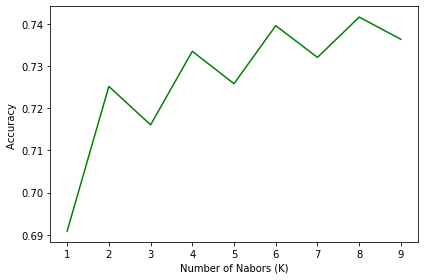

,Ks,mean_acc
7,8,0.741637
5,6,0.739608
8,9,0.736371
3,4,0.733518
6,7,0.732076
4,5,0.725839
1,2,0.725192
2,3,0.716072
0,1,0.690859


In [54]:
plt.plot(range(1, Ks), mean_acc, 'g')
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

Ks_list = []

for i in range(1, Ks):
    Ks_list.append(i)
    
data_tuples = list(zip(Ks_list, mean_acc))

Ks_performance = pd.DataFrame(data_tuples, columns=['Ks','mean_acc'])

Ks_performance.sort_values(by=["mean_acc"], ascending = False)

<p>Based on the results, using 8 kernels is the best option</p>

<h4>Decision Tree</h4>

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
max_depth = 10
acc_score = np.zeros((max_depth - 1))

for i in range(1, max_depth):
    severityTree = DecisionTreeClassifier(criterion="entropy", max_depth = i)
    severityTree.fit(X_train, y_train)
    predTree = severityTree.predict(X_test)
    acc_score[i - 1] = metrics.accuracy_score(y_test, predTree)

acc_score

array([0.73151717, 0.74693301, 0.74816863, 0.75055162, 0.75290518,
       0.75405254, 0.75722985, 0.75537642, 0.75531758])

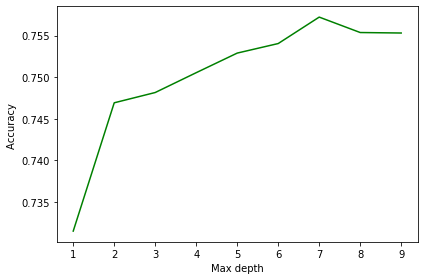

,depth,acc_score
6,7,0.757230
7,8,0.755376
8,9,0.755318
5,6,0.754053
4,5,0.752905
3,4,0.750552
2,3,0.748169
1,2,0.746933
0,1,0.731517


In [57]:
plt.plot(range(1, max_depth), acc_score, 'g')
plt.ylabel('Accuracy ')
plt.xlabel('Max depth')
plt.tight_layout()
plt.show()
    
depth_list = []

for i in range(1, max_depth):
    depth_list.append(i)
    
data_tuples = list(zip(depth_list, acc_score))

depth_performance = pd.DataFrame(data_tuples, columns=['depth','acc_score'])

depth_performance.sort_values(by=["acc_score"], ascending = False)

<p>Based on the results using a max depth of 7 is the best option</p>

<h4>Support Vector Machine</h4>

In [58]:
from sklearn import svm

In [59]:
kernels = ["linear", "poly", "rbf", "sigmoid"]

acc_score = np.zeros(4)

for i in range(0, len(kernels)):
    clf = svm.SVC(kernel = kernels[i])
    clf.fit(X_train, y_train)
    pred_svm = clf.predict(X_test)
    acc_score[i] = metrics.accuracy_score(y_test, pred_svm)

acc_score

C:\Users\Josem\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Josem\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Josem\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Josem\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pleas

array([0.6925951 , 0.73184078, 0.75490571, 0.62116443])

In [60]:
data_tuples = list(zip(kernels, acc_score))

kernelType_performance = pd.DataFrame(data_tuples, columns=['kernel type','acc_score'])

kernelType_performance.sort_values(by=["acc_score"], ascending = False)

,kernel type,acc_score
2,rbf,0.754906
1,poly,0.731841
0,linear,0.692595
3,sigmoid,0.621164


<p>Based on the results, using rbf kernel is the best option</p>

<h4>Logistic Regression</h4>

In [64]:
from sklearn.linear_model import LogisticRegression

C:\Users\Josem\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Josem\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Josem\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Josem\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

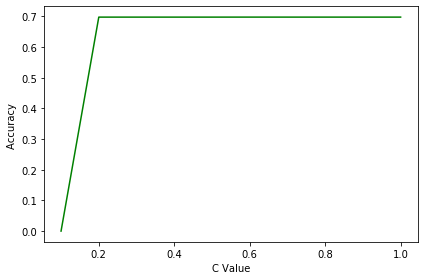

,C,acc_score
5,0.6,0.697626
6,0.7,0.697596
7,0.8,0.697596
8,0.9,0.697596
9,1.0,0.697596
1,0.2,0.697567
2,0.3,0.697567
3,0.4,0.697567
4,0.5,0.697567
0,0.1,0.000000


In [68]:
acc_score = np.zeros(10)

for i in range(1, 10):
    LR = LogisticRegression(C = i / 10, solver='sag').fit(X_train,y_train)
    pred_LR = LR.predict(X_test)
    predLR_prob = LR.predict_proba(X_test)
    acc_score[i] = metrics.accuracy_score(y_test, pred_LR)
    
C_list = []

for i in range(1, 11):
    C_list.append(i / 10)

plt.plot(C_list, acc_score, 'g')
plt.ylabel('Accuracy ')
plt.xlabel('C Value')
plt.tight_layout()
plt.show()            
    
data_tuples = list(zip(C_list, acc_score))

C_performance = pd.DataFrame(data_tuples, columns=['C','acc_score'])

C_performance.sort_values(by=["acc_score"], ascending = False)

In [69]:
LR = LogisticRegression(C = .6, solver='sag').fit(X_train, y_train)

pred_LR = LR.predict(X_test)

data_tuples = list(zip(pred_LR, predLR_prob))

pred_comparasion = pd.DataFrame(data_tuples, columns=['prediction','probability: class 1 | class 0'])

print(pred_comparasion[0:5])

C:\Users\Josem\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


   prediction             probability: class 1 | class 0
0           1   [0.520446140490697, 0.47955385950930296]
1           1  [0.7814193923171546, 0.21858060768284535]
2           1  [0.5880968275661569, 0.41190317243384317]
3           1  [0.8411390703331401, 0.15886092966685994]
4           1  [0.5819138321571864, 0.41808616784281355]


<p>Based on the results, having a value of .6 in C is the option</p>

<h4>Final evaluation</h4>

In [70]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [73]:
algorithm_lst = ["KNN", "Desicion Tree", "SVM", "Logistic Regression"]

In [75]:
LogLoss_lst = []
Jaccard_lst = []
F1score_lst = []

neigh = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train)
yhat = neigh.predict(X_test)

LogLoss_lst.append(log_loss(y_test, yhat))
Jaccard_lst.append(jaccard_similarity_score(y_test, yhat))
F1score_lst.append(f1_score(y_test, yhat, average = 'weighted'))


severityTree = DecisionTreeClassifier(criterion="entropy", max_depth = 7)
severityTree.fit(X_train, y_train)
predTree = severityTree.predict(X_test)

LogLoss_lst.append(log_loss(y_test, predTree))
Jaccard_lst.append(jaccard_similarity_score(y_test, predTree))
F1score_lst.append(f1_score(y_test, predTree, average = 'weighted'))


clf = svm.SVC(kernel = 'rbf')
clf.fit(X_train, y_train)
pred_svm = clf.predict(X_test)

LogLoss_lst.append(log_loss(y_test, pred_svm))
Jaccard_lst.append(jaccard_similarity_score(y_test, pred_svm))
F1score_lst.append(f1_score(y_test, pred_svm, average = 'weighted'))


LR = LogisticRegression(C = .6, solver = 'sag').fit(X_train, y_train)
pred_LR = LR.predict(X_test)

LogLoss_lst.append(log_loss(y_test, pred_LR))
Jaccard_lst.append(jaccard_similarity_score(y_test, pred_LR))
F1score_lst.append(f1_score(y_test, pred_LR, average = 'weighted'))


data_tuples = list(zip(algorithm_lst, Jaccard_lst, F1score_lst, LogLoss_lst))

report = pd.DataFrame(data_tuples, columns=['Algorithm','Jaccard', 'F1-score', 'LogLoss'])

report

C:\Users\Josem\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
C:\Users\Josem\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)
C:\Users\Josem\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)
C:\Users\Josem\Anaconda3\lib\s

,Algorithm,Jaccard,F1-score,LogLoss
0,KNN,0.732076,0.720656,23.921941
1,Desicion Tree,0.757259,0.717015,23.921941
2,SVM,0.754906,0.712031,23.921941
3,Logistic Regression,0.697596,0.629251,23.921941


<p>Based on the results, the best predictive model is Desicion Tree</p>

<h3>Results</h3>

<p>Talking exclusively of Seattle city, the main cause of most of car accidents is not the weather, road or light in bad conditions; leaving this causes in second place. However, most of the accidents are of type parked car and rear ended with severity codes of 1(Property damage) and 2(Injury) respectively and most of them have occured in mid-blocks not related to the intersection. In addition to this, in most of the accidents only 2 vehicles are involved having 2 drivers with no passengers.
My guess would be that most drivers are distracted and make mistakes, this point takes force if we pay attention to the fact that in most cases there are only 2 drivers involved, this makes sense because people tend to pay more attention if they have passengers.
</p>

<p>Lastly, most of the accidents occured during the month of October but if we observe the second and third place some differences begin to show up. Having a severity code of 1 we have June and May as second and third place respectively, on the other hand with a severity code of 2, May and July are in second and third place. Could this have something to do with the festivities celebrated during those months? Perhaps, data related to visitors and shopping migth help to answer this question.</p>

<h3>Conclusion</h3>

<p>The porpouse of this project was to prevent further car accidents, the observations made can help of guidence for the authorities and the predictive model can also help authorities to assign resources efficiently. At the end the main goal is to decrease the number of accidents, therefore, drivers can benefit from having this model to prevent posible accidents or having extra attention to the road.</p>